## Model Performance Benchmarks on GPU

In [1]:
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
import os
import glob

In [2]:
path = 'benchmarks_gpu_async/'

In [3]:
runtime_files = glob.glob(os.path.join(path, 'runtime*') )

In [4]:
def generate_dataframes(files, header=None):
    def read_file(file):
        fn = file.split('.')[0]
        df = pd.read_csv(file, header=header)
        df['name']=fn.split('/')[1]
        return df
    dfs = [read_file(file) for file in files]
    return dfs

In [5]:
dfs = generate_dataframes(runtime_files, 0)
runtime = pd.concat(dfs)

In [10]:
sp = runtime["name"].str.split("_", n = 2, expand = True) 
runtime['models'] = sp[1]
runtime['num_of_workers'] = sp[2]
#runtime['num_of_workers'] = runtime['num_of_workers'].astype(int)

In [11]:
det_proc_files = [x for x in glob.glob(os.path.join(path, '*')) if 'runtime' not in x and '*' not in x  ]

In [12]:
dfs = generate_dataframes(det_proc_files)
det_proc_times = pd.concat(dfs)
sp = det_proc_times['name'].str.split("_", n = 2, expand = True) 
det_proc_times['model'] = sp[1]
det_proc_times['num_of_workers'] = sp[2]
det_proc_times = det_proc_times.rename(columns={0: "proc_time", 1: "status"})

In [13]:
det_proc_times.groupby(['model', 'num_of_workers', 'status'])['proc_time'].mean().reset_index()

model num_of_workers   status  proc_time
0     cnn              1   failed   0.005847
1     cnn              1  success   0.024827
2     cnn              2   failed   0.015865
3     cnn              2  success   0.026515
4     cnn              3   failed   0.017193
5     cnn              3  success   0.046879
6     dnn              1  success   0.017032
7     dnn              2  success   0.033484
8     dnn              3  success   0.054306
9   mtcnn              1   failed   0.006357
10  mtcnn              1  success   0.030146
11  mtcnn              2   failed   0.025254
12  mtcnn              2  success   0.036728
13  mtcnn              3   failed   0.030606
14  mtcnn              3  success   0.065288

In [14]:
det_proc_times[det_proc_times['num_of_workers'] == '1'].groupby(['model', 'status'])['status'].count().reset_index(name='count')

model   status  count
0    cnn   failed     86
1    cnn  success     51
2    dnn  success    137
3  mtcnn   failed     80
4  mtcnn  success     57

In [119]:
def scatter_plot(models, criteria, title):
    plt.figure(figsize=(10,8))
    for index, model in enumerate(models):
        x = runtime[runtime['models'] == model]['num_of_workers']
        y = runtime[runtime['models'] == model][criteria]
        plt.scatter(x, y, label=model)
    plt.legend(loc='best')
    plt.xticks(runtime[runtime['models'] == model]['num_of_workers'].unique())
    plt.xlabel('number of workers')
    plt.ylabel('seconds')
    plt.title(title)
    plt.show()

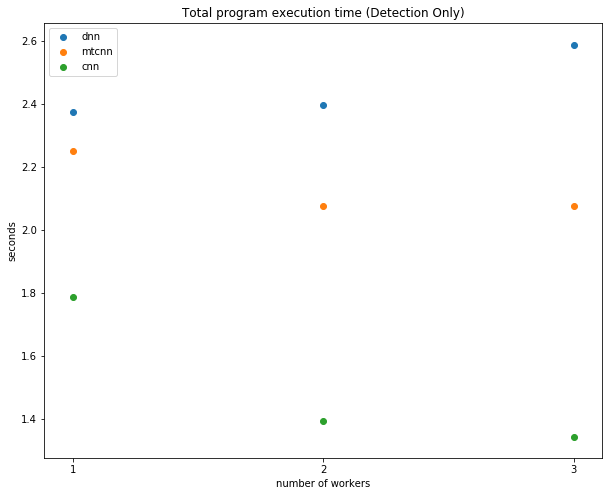

In [120]:
models = runtime[runtime['models'].apply(lambda x:'*' not in x)]['models'].unique()
scatter_plot(models,'tot_time', 'Total program execution time (Detection Only)')

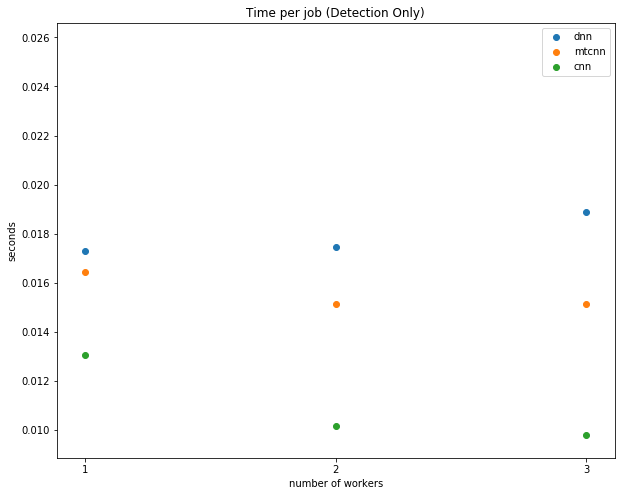

In [37]:
models = runtime[runtime['models'].apply(lambda x:'*' not in x)]['models'].unique()
scatter_plot(models,'time_per_job', 'Time per job (Detection Only)')

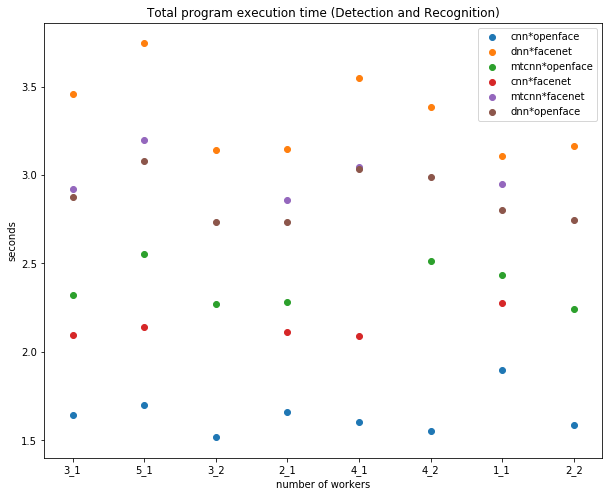

In [38]:
models = runtime[runtime['models'].apply(lambda x:'*' in x)]['models'].unique()
scatter_plot(models,'tot_time', 'Total program execution time (Detection and Recognition)')

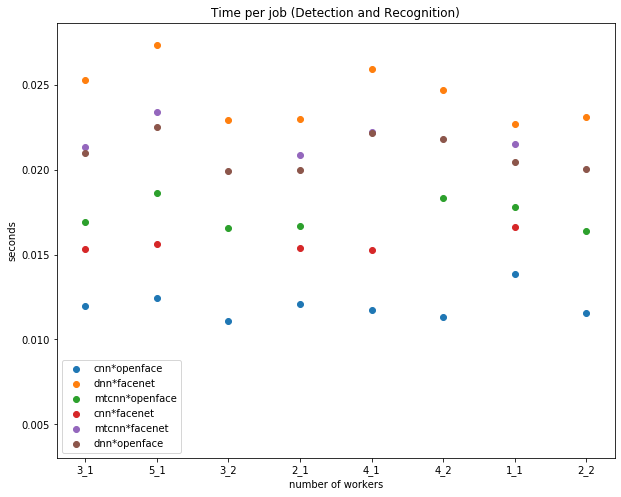

In [40]:
models = runtime[runtime['models'].apply(lambda x:'*' in x)]['models'].unique()
scatter_plot(models,'time_per_job', 'Time per job (Detection and Recognition)')